In [1]:
!pip install tensorflow-gpu
!pip install mlxtend

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten , Dense, Conv2D,MaxPool2D,Dropout
print(tf.__version__)

2.1.0


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Keras has cifar 10
from tensorflow.keras.datasets import cifar10

In [0]:
# For Scikit Learn
# X_train,X_test,y_train,y_test
# For Keras - Tensorflow
# (X_train,y_train),(X_test,y_test)
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [0]:
classes_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
X_train.max()

255

In [0]:
X_train = X_train / 255.0 
X_test = X_test / 255.0 

In [9]:
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

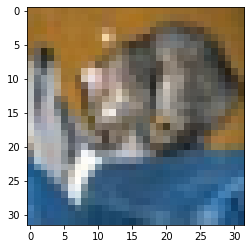

In [10]:
plt.imshow(X_test[0])

In [11]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

# Build CNN Model

In [12]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu",input_shape=[32,32,3]))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu")) # Don't need input shape later
model.add(MaxPool2D(pool_size=(2,2),padding="valid"))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units=10,activation="softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [0]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["sparse_categorical_accuracy"])

In [14]:
# Recording the Training of the model
history = model.fit(X_train,y_train,batch_size=10,epochs=10,verbose=1,validation_data=(X_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 189s 4ms/sample - loss: 1.3889 - sparse_categorical_accuracy: 0.5007 - val_loss: 1.0858 - val_sparse_categorical_accuracy: 0.6237
Epoch 2/10
50000/50000 [==============================] - 190s 4ms/sample - loss: 1.0728 - sparse_categorical_accuracy: 0.6212 - val_loss: 0.9911 - val_sparse_categorical_accuracy: 0.6528
Epoch 3/10
50000/50000 [==============================] - 193s 4ms/sample - loss: 0.9382 - sparse_categorical_accuracy: 0.6690 - val_loss: 0.9458 - val_sparse_categorical_accuracy: 0.6702
Epoch 4/10
50000/50000 [==============================] - 197s 4ms/sample - loss: 0.8490 - sparse_categorical_accuracy: 0.7006 - val_loss: 0.8923 - val_sparse_categorical_accuracy: 0.6888
Epoch 5/10
50000/50000 [==============================] - 190s 4ms/sample - loss: 0.7749 - sparse_categorical_accuracy: 0.7250 - val_loss: 0.9202 - val_sparse_categorical_accuracy: 0.6849
Epoch 6/10

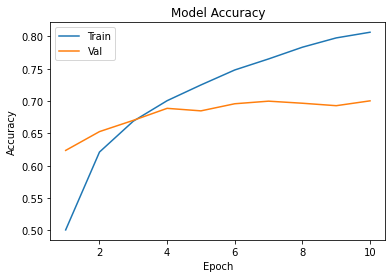

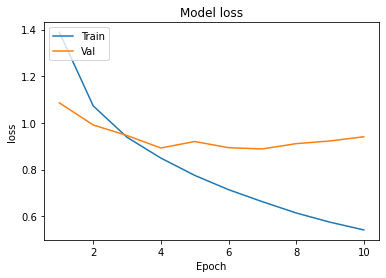

In [20]:
# Plot the training and validation accuracy valeus
epoch_range = range(1,11)
plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Val"],loc = "upper left")
plt.show()
# Plot the training and validation accuracy valeus
epoch_range = range(1,11)
plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend(["Train","Val"],loc = "upper left")
plt.show()

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


In [0]:
y_pred = model.predict_classes(X_test)

In [23]:
y_pred

array([5, 8, 8, ..., 5, 1, 7])

In [24]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [26]:
mat = confusion_matrix(y_test,y_pred)
mat

array([[745,  17,  32,  24,  41,   6,  13,  16,  61,  45],
       [ 15, 818,   5,  15,   5,   5,  11,   4,  24,  98],
       [ 65,   7, 447,  80, 183,  82,  80,  39,   5,  12],
       [ 18,   9,  40, 547, 135, 137,  61,  28,  12,  13],
       [  9,   1,  23,  61, 755,  22,  56,  62,  10,   1],
       [  6,   6,  22, 191,  92, 583,  34,  51,   9,   6],
       [  3,   3,  12,  78,  99,  21, 772,   7,   2,   3],
       [ 13,   1,  13,  42,  85,  51,   7, 778,   2,   8],
       [ 75,  36,  13,  20,  15,   7,  11,   5, 788,  30],
       [ 35,  80,   4,  23,  17,  13,   7,  29,  21, 771]])

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff565927cf8>)

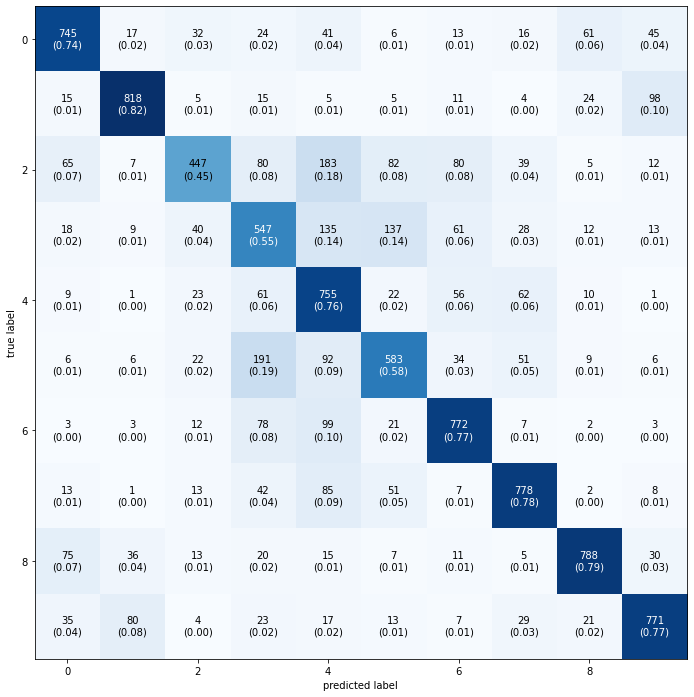

In [32]:
# plot_confusion_matrix(mat,figsize=(12,12),class_names=classes_name,show_normed=True)
plot_confusion_matrix(mat,figsize=(12,12),show_normed=True)